### Problem Statement

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 

In [62]:
import warnings
warnings.filterwarnings('ignore') 

In [82]:
from scipy.stats import ttest_ind,f_oneway,chi2_contingency

### Analysing Basic Metrices

In [3]:
df=pd.read_csv("D:\SQL\Data Analytics\yulu.csv")

In [4]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


#### Shape of Dataset

In [9]:
df.shape

(10886, 12)

In [10]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Datatypes of Columns

In [12]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

1. The columns season, holiday, workingday and weather  can be converted into category datatype.
2. The column datetime can be converted to datetime datatype

In [18]:
df["season"] = df["season"].astype('category')
df["holiday"] = df["holiday"].astype('category')
df["workingday"] = df["workingday"].astype('category')
df["weather"] = df["weather"].astype('category')
df['datetime'] = pd.to_datetime(df['datetime'])

In [19]:
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

#### Statistical summary

In [14]:
df.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


#### Checking Null Vaues

In [16]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
df.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

#### Insights

1. There are 10886 rows and 12 columns.
2. There are no null values in the dataset.
3. casual and registered attributes might have outliers because their mean  are very far away to one another and the value of     standard deviation is also high which tells us that there is high variance in the data of these attributes.

### Non-Graphical Analysis: Value counts and unique attributes

In [20]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [21]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [84]:
df['workingday'].value_counts(normalize="True")

1    0.680875
0    0.319125
Name: workingday, dtype: float64

In [23]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [24]:
df['casual'].value_counts()

0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: casual, Length: 309, dtype: int64

In [25]:
df['registered'].value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: registered, Length: 731, dtype: int64

In [26]:
df['humidity'].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

#### Insights

1. All seasons are almost have equal number of entries in dataset
2. We have 32 % holidays in dataset
3. Maximum number of days had Clear, Few clouds, partly cloudy, partly cloudy weather and minimum number of days had Type 4        (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) weather.
4. For maximum number of days n casual users used yulu.
5. Maximum number of days had  3 to 4 registered users.
6. Maximum number of days had humidity level of 88

### Visual Analysis - Univariate & Bivariate

#### Univariate

##### Numerical

<Axes: xlabel='temp', ylabel='Count'>

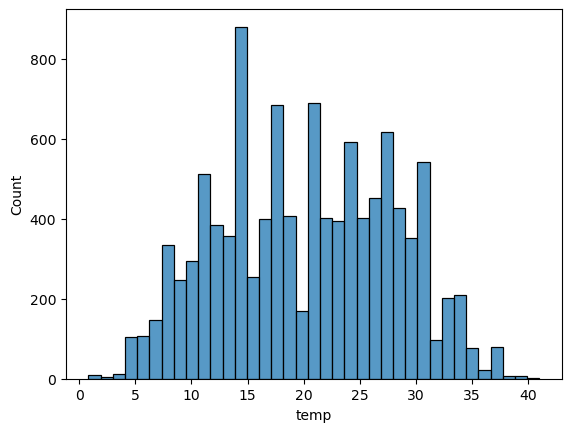

In [27]:
sns.histplot(data=df, x="temp")

<Axes: xlabel='atemp', ylabel='Count'>

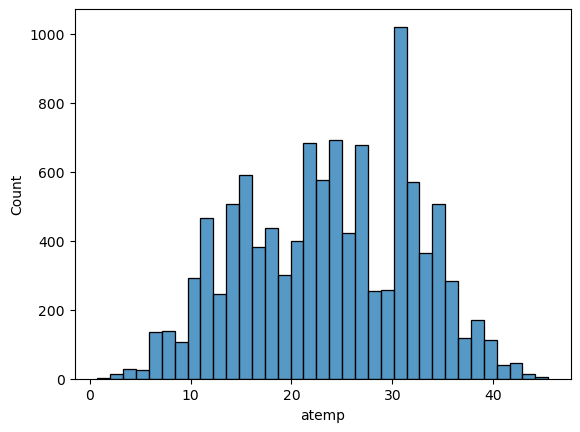

In [28]:
sns.histplot(data=df, x="atemp")

<Axes: xlabel='humidity', ylabel='Count'>

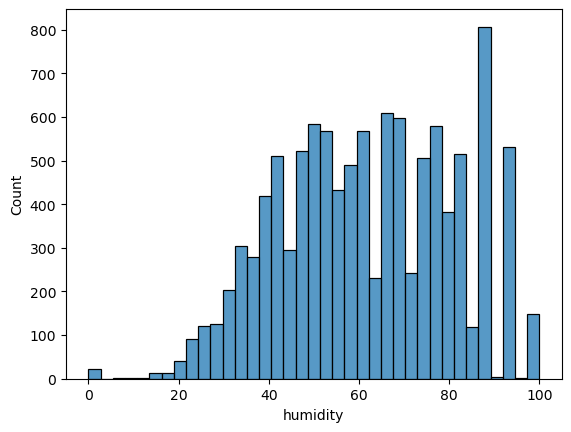

In [29]:
sns.histplot(data=df, x="humidity")

<Axes: xlabel='windspeed', ylabel='Count'>

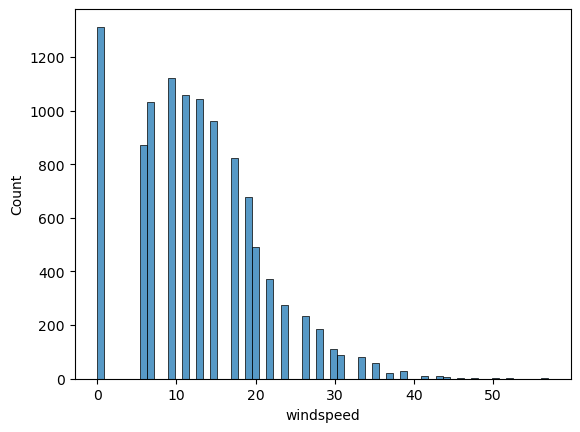

In [30]:
sns.histplot(data=df, x="windspeed")

<Axes: xlabel='casual', ylabel='Count'>

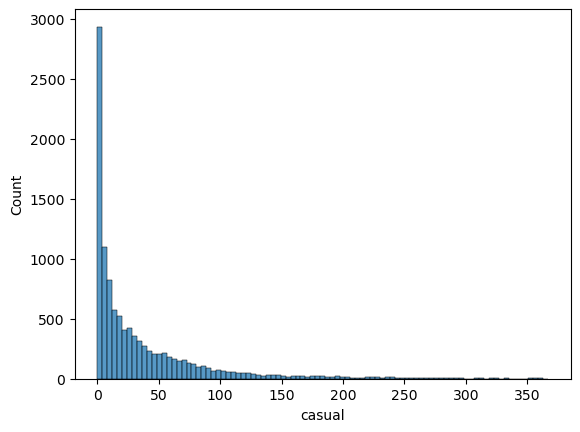

In [31]:
sns.histplot(data=df, x="casual")

<Axes: xlabel='registered', ylabel='Count'>

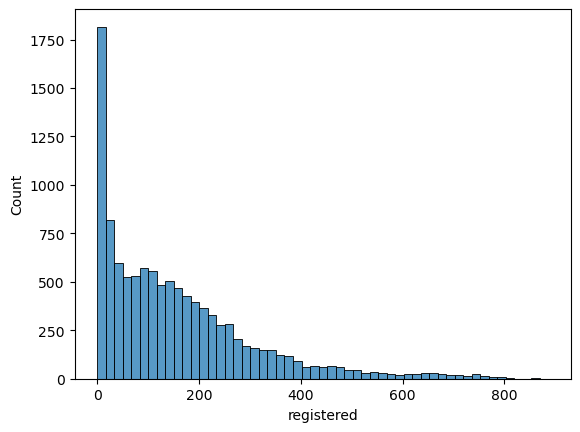

In [32]:
sns.histplot(data=df, x="registered")

<Axes: xlabel='count', ylabel='Count'>

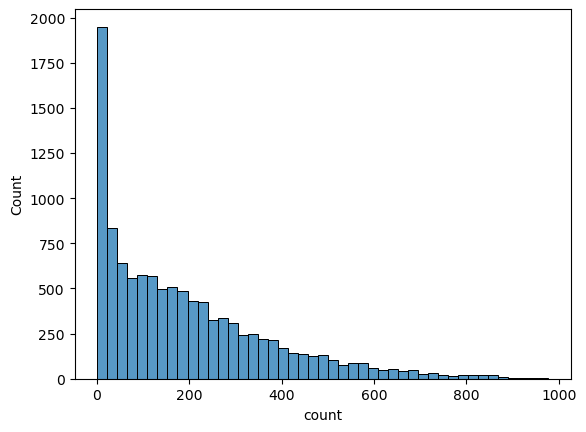

In [33]:
sns.histplot(data=df, x="count")

##### Categorical

<Axes: xlabel='season', ylabel='count'>

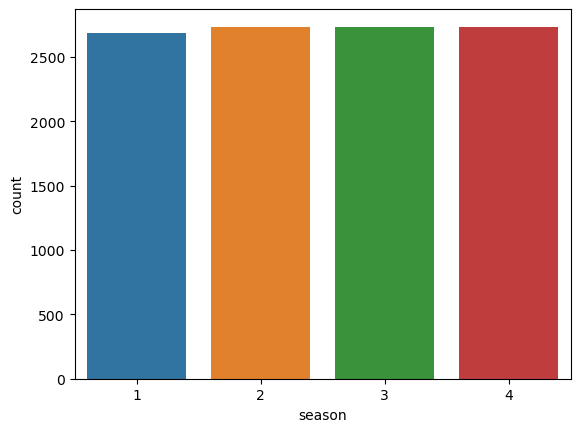

In [34]:
sns.countplot(df, x="season")

<Axes: xlabel='holiday', ylabel='count'>

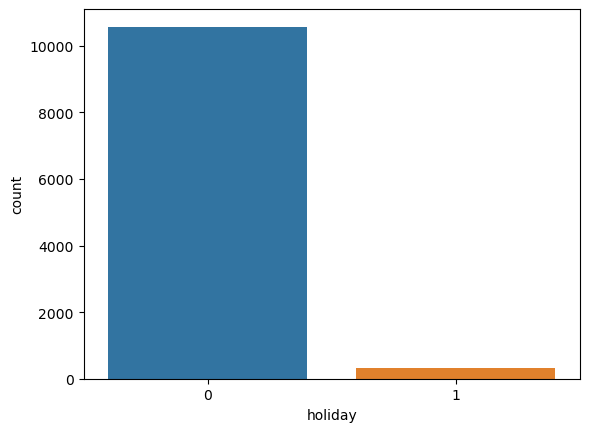

In [36]:
sns.countplot(df, x="holiday")

<Axes: xlabel='workingday', ylabel='count'>

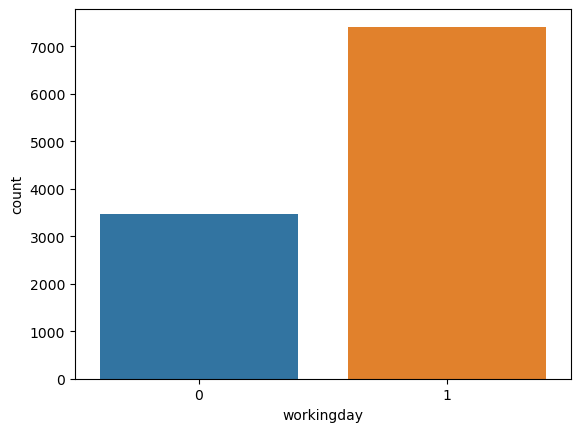

In [37]:
sns.countplot(df, x="workingday")

<Axes: xlabel='weather', ylabel='count'>

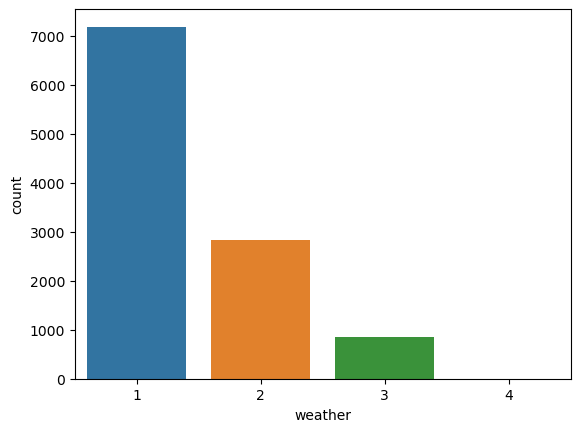

In [38]:
sns.countplot(df, x="weather")

#### Insights

1. Features temp, atemp and humidity looks like they follows the Normal Distribution.
2. Features casual, registered and count somewhat looks like Log Normal Distrinution.
3. there are more number of working days compared to wekends or holidays.

#### Outliers Detection

<Axes: >

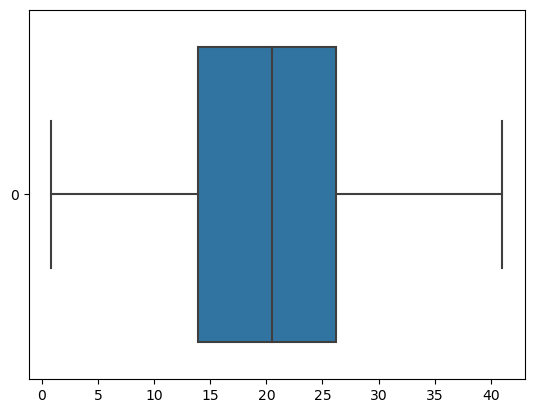

In [48]:
sns.boxplot(data = df["temp"],orient="h")


<Axes: >

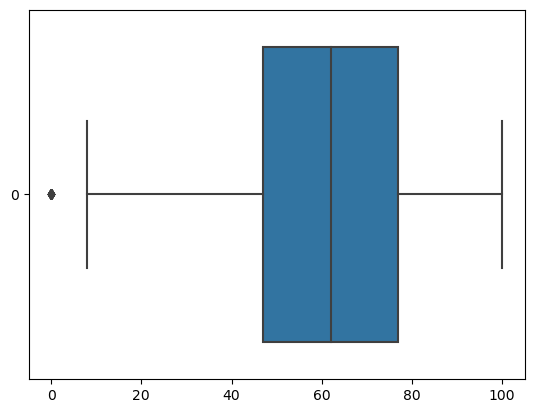

In [47]:
sns.boxplot(data = df["humidity"],orient="h")

<Axes: >

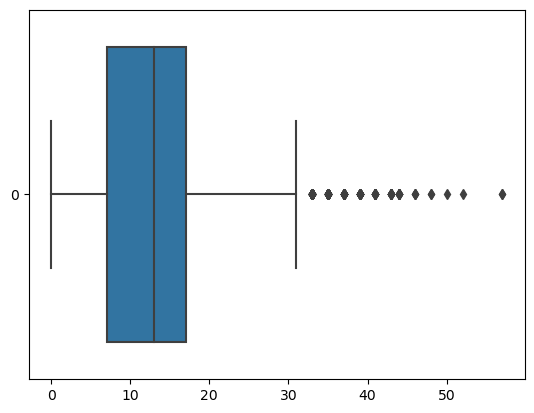

In [49]:
sns.boxplot(data = df["windspeed"],orient="h")

<Axes: >

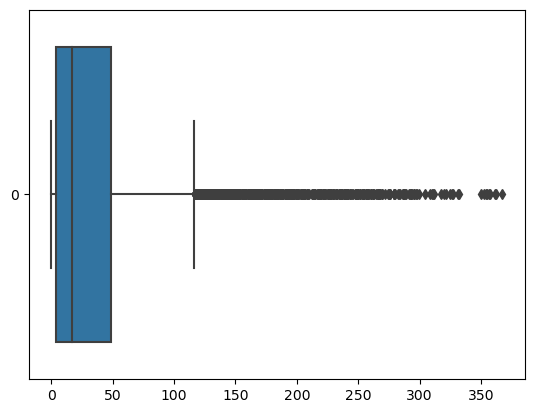

In [50]:
sns.boxplot(data = df["casual"],orient="h")

<Axes: >

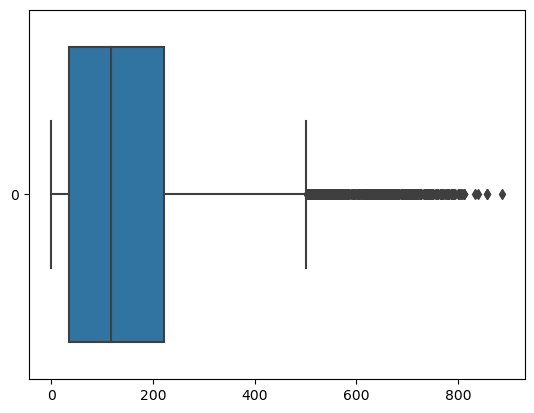

In [51]:
sns.boxplot(data = df["registered"],orient="h")

<Axes: >

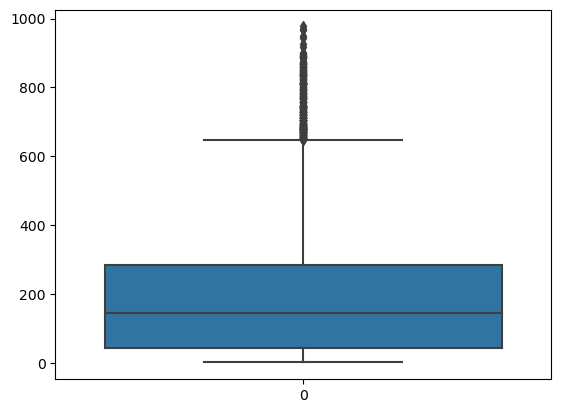

In [46]:
sns.boxplot(data = df["count"])

#### Insights

1. Feature temp has no outliers
2. Features windspeed and humidity has few outliers.
3. Features count,registered and casual have many outliers.

### Bivariate Analysis

Relationship between workday and count

<Axes: xlabel='workingday', ylabel='count'>

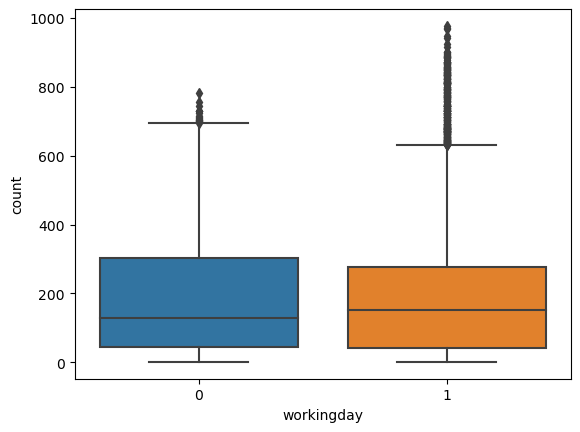

In [53]:
sns.boxplot(data = df, x = 'workingday', y = 'count')

Relationship between season and count

<Axes: xlabel='season', ylabel='count'>

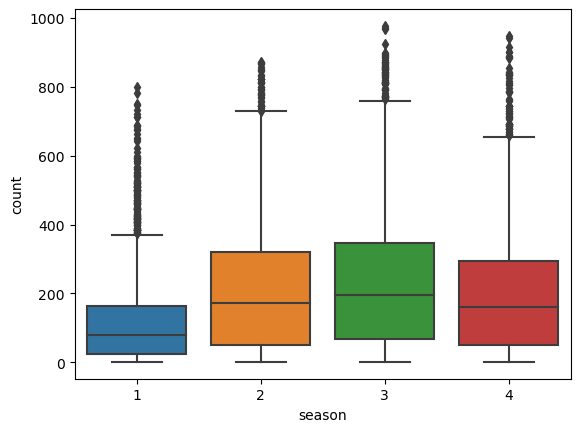

In [54]:
sns.boxplot(data = df, x = 'season', y = 'count')

Relationship between season and count

<Axes: xlabel='weather', ylabel='count'>

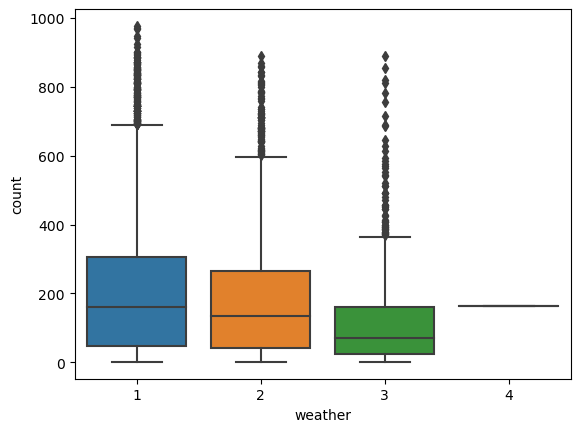

In [55]:
sns.boxplot(data = df, x = 'weather', y = 'count')

<Axes: xlabel='humidity', ylabel='count'>

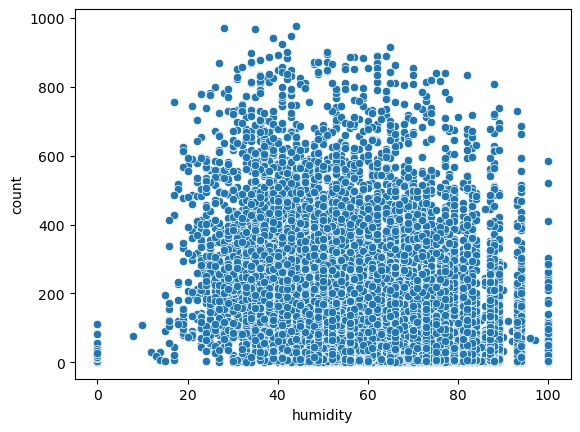

In [56]:
sns.scatterplot(data=df, x="humidity", y='count')

<Axes: xlabel='atemp', ylabel='count'>

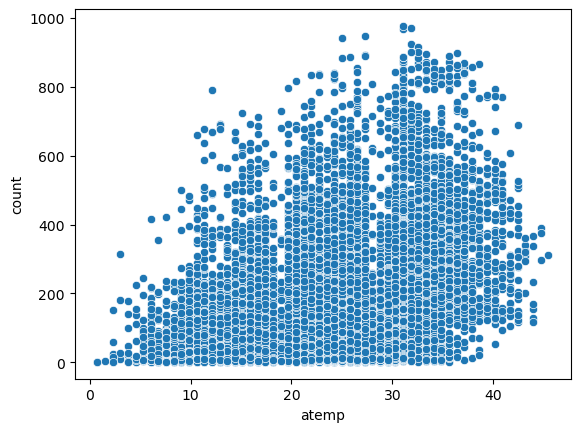

In [57]:
sns.scatterplot(data=df, x="atemp", y='count')

<Axes: xlabel='windspeed', ylabel='count'>

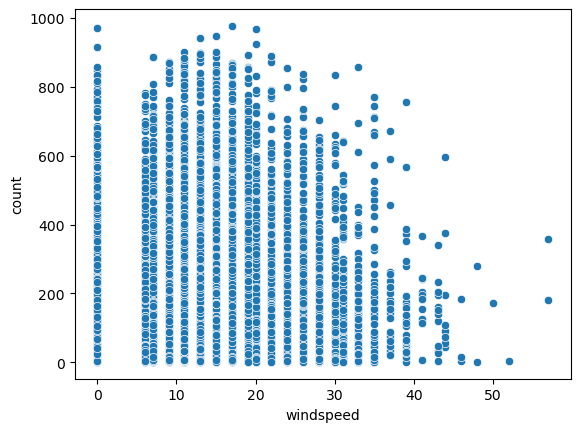

In [58]:
sns.scatterplot(data=df, x="windspeed", y='count')

correlation between count and other variables 

In [63]:
df.corr()['count']

temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

<Axes: >

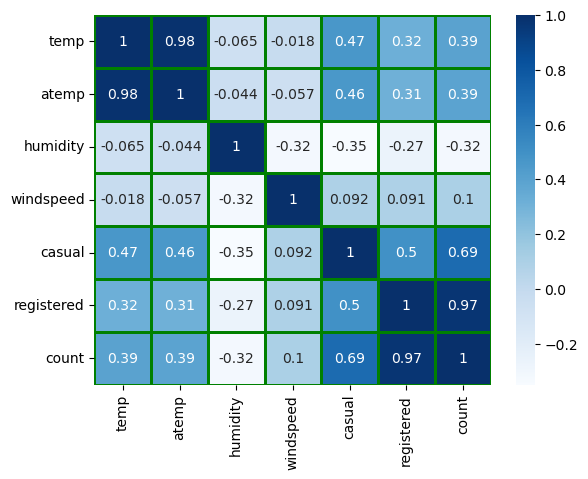

In [65]:
sns.heatmap(df.corr(), annot=True,cmap="Blues",linewidths=1.0,linecolor="green")

#### Insight

1. More number of bike are rented on non-working days.
2. Summer and Fall had more bike users and spring had the least number of bike users.
3. Weather type 4( rain, thunderstorms and fog) had minimum number of bikes rented and clear weather had maximum number of bikes    rented.
4. Less number of bikes were rented for days with humidity level less than 20.
5. Less number of bikess were rented as days get colder.
6. renting of bikes decreases on days with windspeed greater than 35
7. We can see strong corelation between temp and atemp,casual and count, registered and count.
8. Humidity has a negative coorlation with every other feature.


### Hypothesis Testing

##### 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

Null Hypothesis: Working day has no effect on the number of cycles being rented

Alternate Hypothesis: Working day has effect on the number of cycles being rented.

Let Sigificance Level(alpha): 0.05

In [67]:
work=df[df['workingday']==1]['count'].values
no_work=df[df['workingday']==0]['count'].values

If working day has effect on number of cycles used then we asume that number of cycles rented on non working day < number of cycles rented on working day , hence we choose alyernative as less.

In [73]:
ttest_ind(no_work,work,alternative="less")

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.11322402113180674)

p value=0.11

p value>alpha so we cannot reject Null Hypothesis.
We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

#### ANNOVA 
#### to check if No. of cycles rented is similar or different in different  weather 

Null Hypothesis: Number of cycles rented is similar in different weather.

Alternate Hypothesis: Number of cycles rented is not similar in different weather.

Let Sigificance Level(alpha): 0.05

In [75]:
we1 = df[df['weather']==1]['count'].values
we2 = df[df['weather']==2]['count'].values
we3 = df[df['weather']==3]['count'].values
we4 = df[df['weather']==4]['count'].values

In [76]:
f_oneway(we1,we2,we3,we4)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

p value=5.482069475935669e-42

p value < alpha , so we reject the Null Hypothesis. Thus Number of cycles rented is not similar in different weather .

##### to check if No. of cycles rented is similar or different in different season

Null Hypothesis: Number of cycles rented is similar in different season.

Alternate Hypothesis: Number of cycles rented is not similar in different season.

Let Sigificance Level(alpha): 0.05

In [77]:
s1 = df[df['season']==1]['count'].values
s2 = df[df['season']==2]['count'].values
s3 = df[df['season']==3]['count'].values
s4 = df[df['season']==4]['count'].values

In [78]:
f_oneway(s1,s2,s3,s4)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

p value=6.164843386499654e-149

p value < alpha , so we reject the Null Hypothesis. Thus Number of cycles rented is not similar in different season .

#### Chi-square test 

##### To check if Weather is dependent on the season 

Null Hypothesis: Weather is independent of the season

Alternate Hypothesis: Weather dependent of the season

Let Sigificance Level(alpha): 0.05

In [79]:
observation= pd.crosstab(df['season'], df['weather'])

In [80]:
observation

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [83]:
chi2_contingency(observation)

Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

p value=1.549925073686492e-07

p value < alpha , so we reject the Null Hypothesis.

Thus We conclude Weather is dependent on the season.

#### Insights

##### 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented
Null Hypothesis: Working day has no effect on the number of cycles being rented
    
Alternate Hypothesis: Working day has effect on the number of cycles being rented.

p value=0.11 > alpha

We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

##### ANNOVA -to check if No. of cycles rented is similar or different in different weather
Null Hypothesis: Number of cycles rented is similar in different weather.

Alternate Hypothesis: Number of cycles rented is not similar in different weather.
    
p value=5.482069475935669e-42

p value < alpha , so we reject the Null Hypothesis. Thus Number of cycles rented is not similar in different weather .

##### ANNOVA-  if No. of cycles rented is similar or different in different season

Null Hypothesis: Number of cycles rented is similar in different season.

Alternate Hypothesis: Number of cycles rented is not similar in different season.
    
p value=6.164843386499654e-149

p value < alpha , so we reject the Null Hypothesis. Thus Number of cycles rented is not similar in different season .

##### Chi-square test - To check if Weather is dependent on the season
Null Hypothesis: Weather is independent of the season

Alternate Hypothesis: Weather dependent of the season
 
p value=1.549925073686492e-07

p value < alpha , so we reject the Null Hypothesis.

Thus We conclude Weather is dependent on the season.


### Recommendations

1. Yulu can decrease the prices of rental or provide more discounts to increase its rental on working day compared to non-          working day.
2. For days such as whenever temprature is less than 10, whenever the windspeed is greater than 35, in thunderstorms or  very      low humid days, company should have less bikes in the stock to be rented.
3. Increase number of bikes to rent during fall and summer season.
4. yulu can increase or decrease rental price based on traffic and demand of bikes.
5. Provide offers to make casual users to registered users.